In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
results_news = pd.read_pickle('../data/results_news.pkl')
results_roomba = pd.read_pickle('../data/results_roomba.pkl')

In [3]:
def plot_accuracies(acc_dict):
    acc_df = pd.DataFrame(acc_dict)
    acc_df = acc_df[['bow', 'bow_tsvd', 'tfidf', 'tfidf_tsvd', 'w2v_mean',
                     'swem_max', 'scdv_w2v', 'scdv_w2v_raw', 'd2v_default', 'd2v_epochs30', 'fasttext_mean',
                     'swem_max_fasttext', 'scdv_fasttext', 'scdv_fasttext_raw']]
    acc_df = acc_df.rename(columns={
        'fasttext_mean': 'pretrained_fasttext_mean',
        'swem_max_fasttext': 'swem_max_pretrained_fasttext',
        'scdv_fasttext': 'scdv_pretrained_fasttext',
        'scdv_fasttext_raw': 'scdv_pretrained_fasttext_raw'
    })
    acc_df_stacked = acc_df.stack().reset_index().iloc[:,1:]
    acc_df_stacked.columns = ['method', 'accuracy']

    plt.figure(figsize=[20, 7], dpi=300)
    ax = sns.boxplot(x='method', y='accuracy', data=acc_df_stacked)
    sns.swarmplot(x='method', y='accuracy', data=acc_df_stacked)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30);

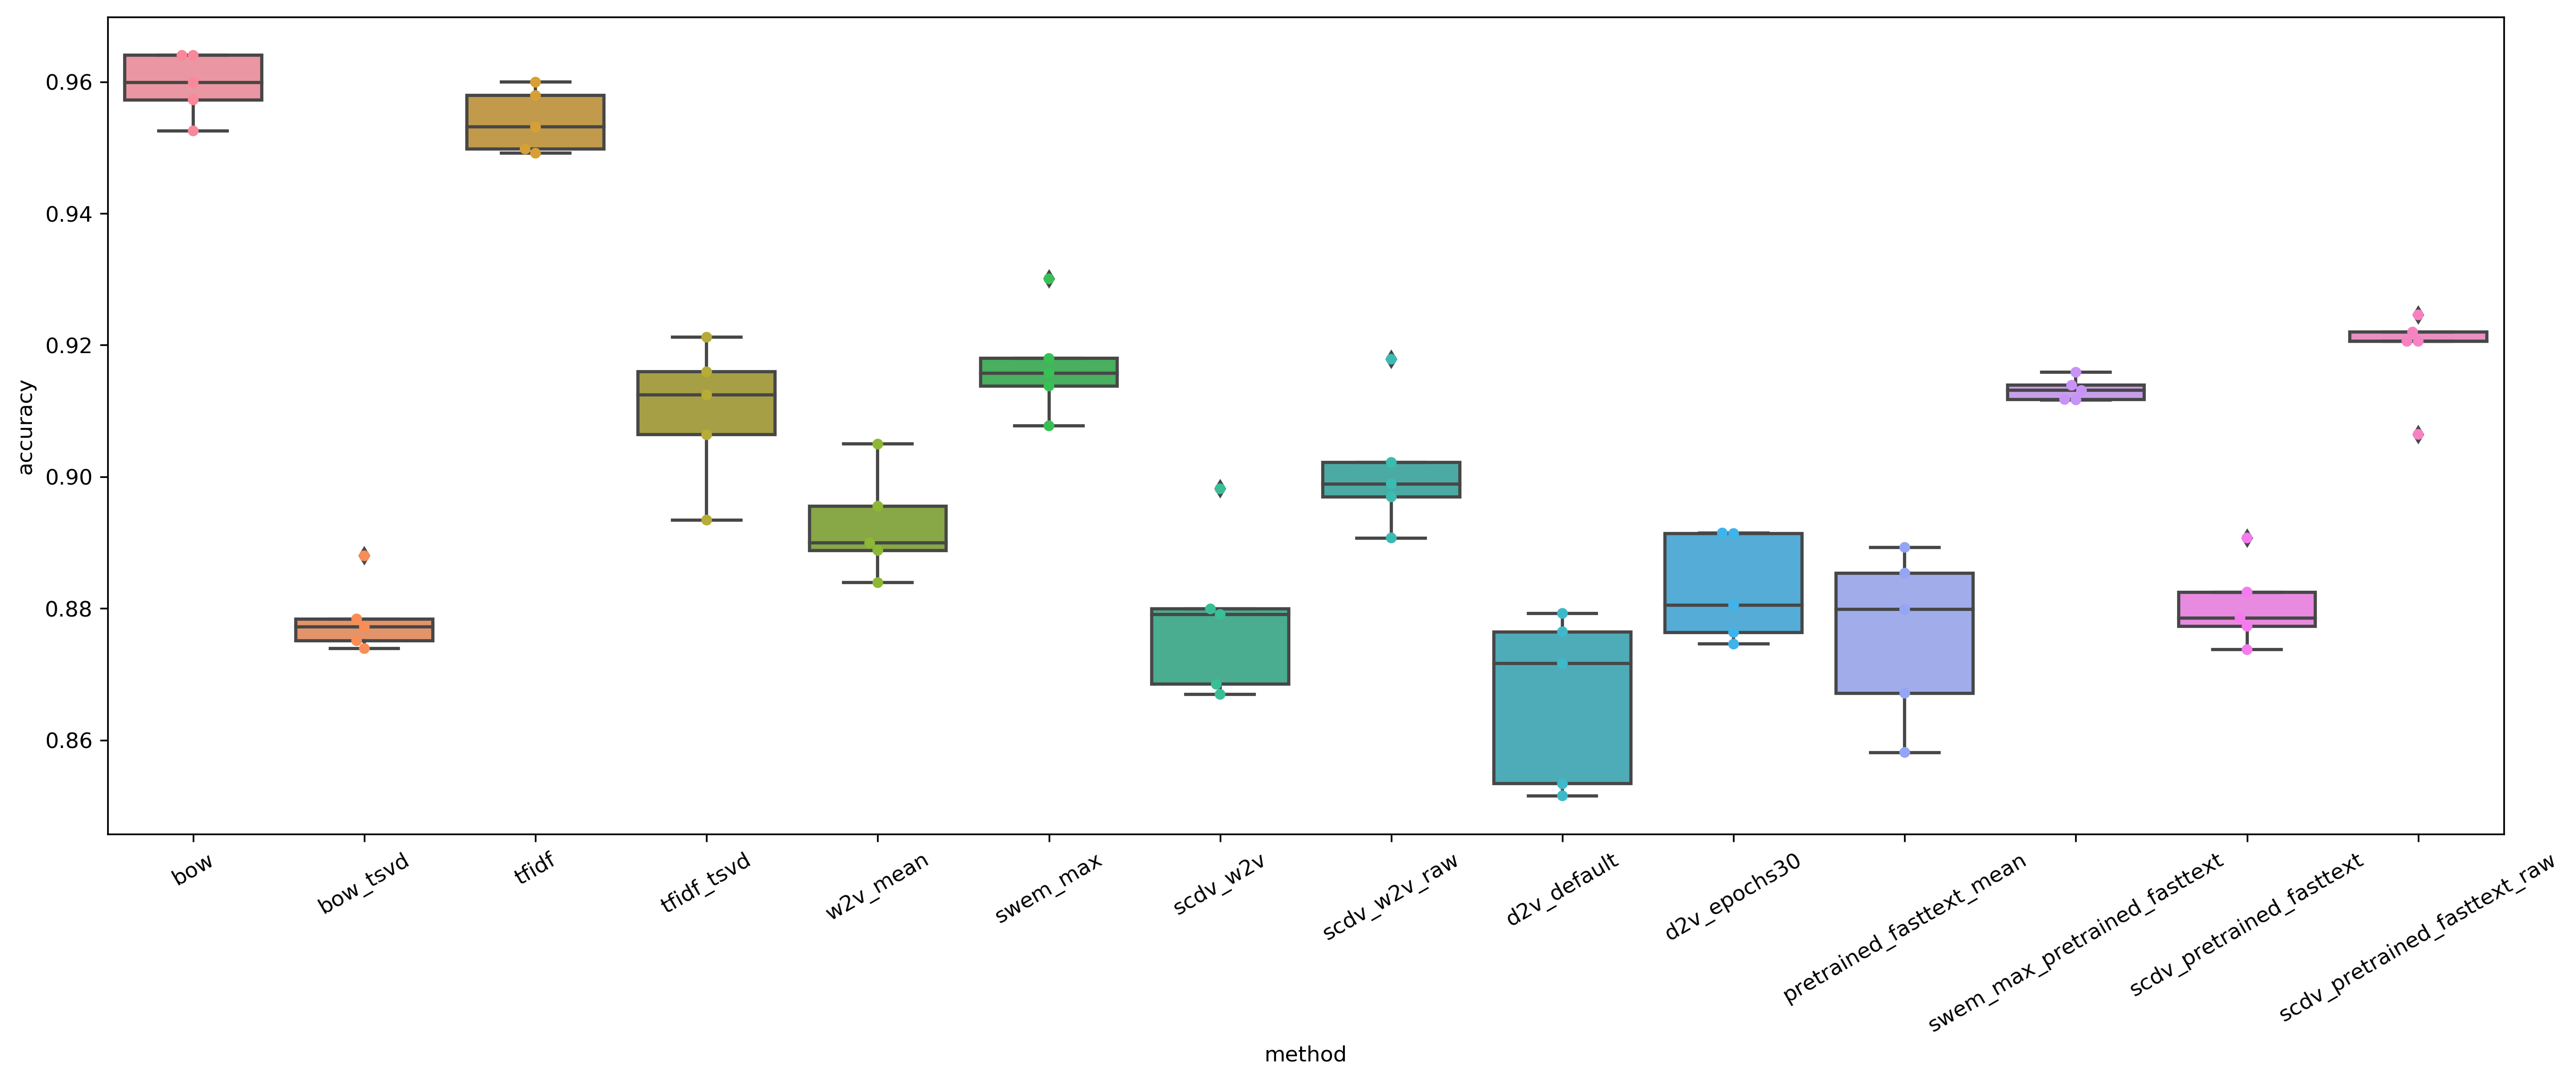

In [4]:
plot_accuracies(results_news[0])

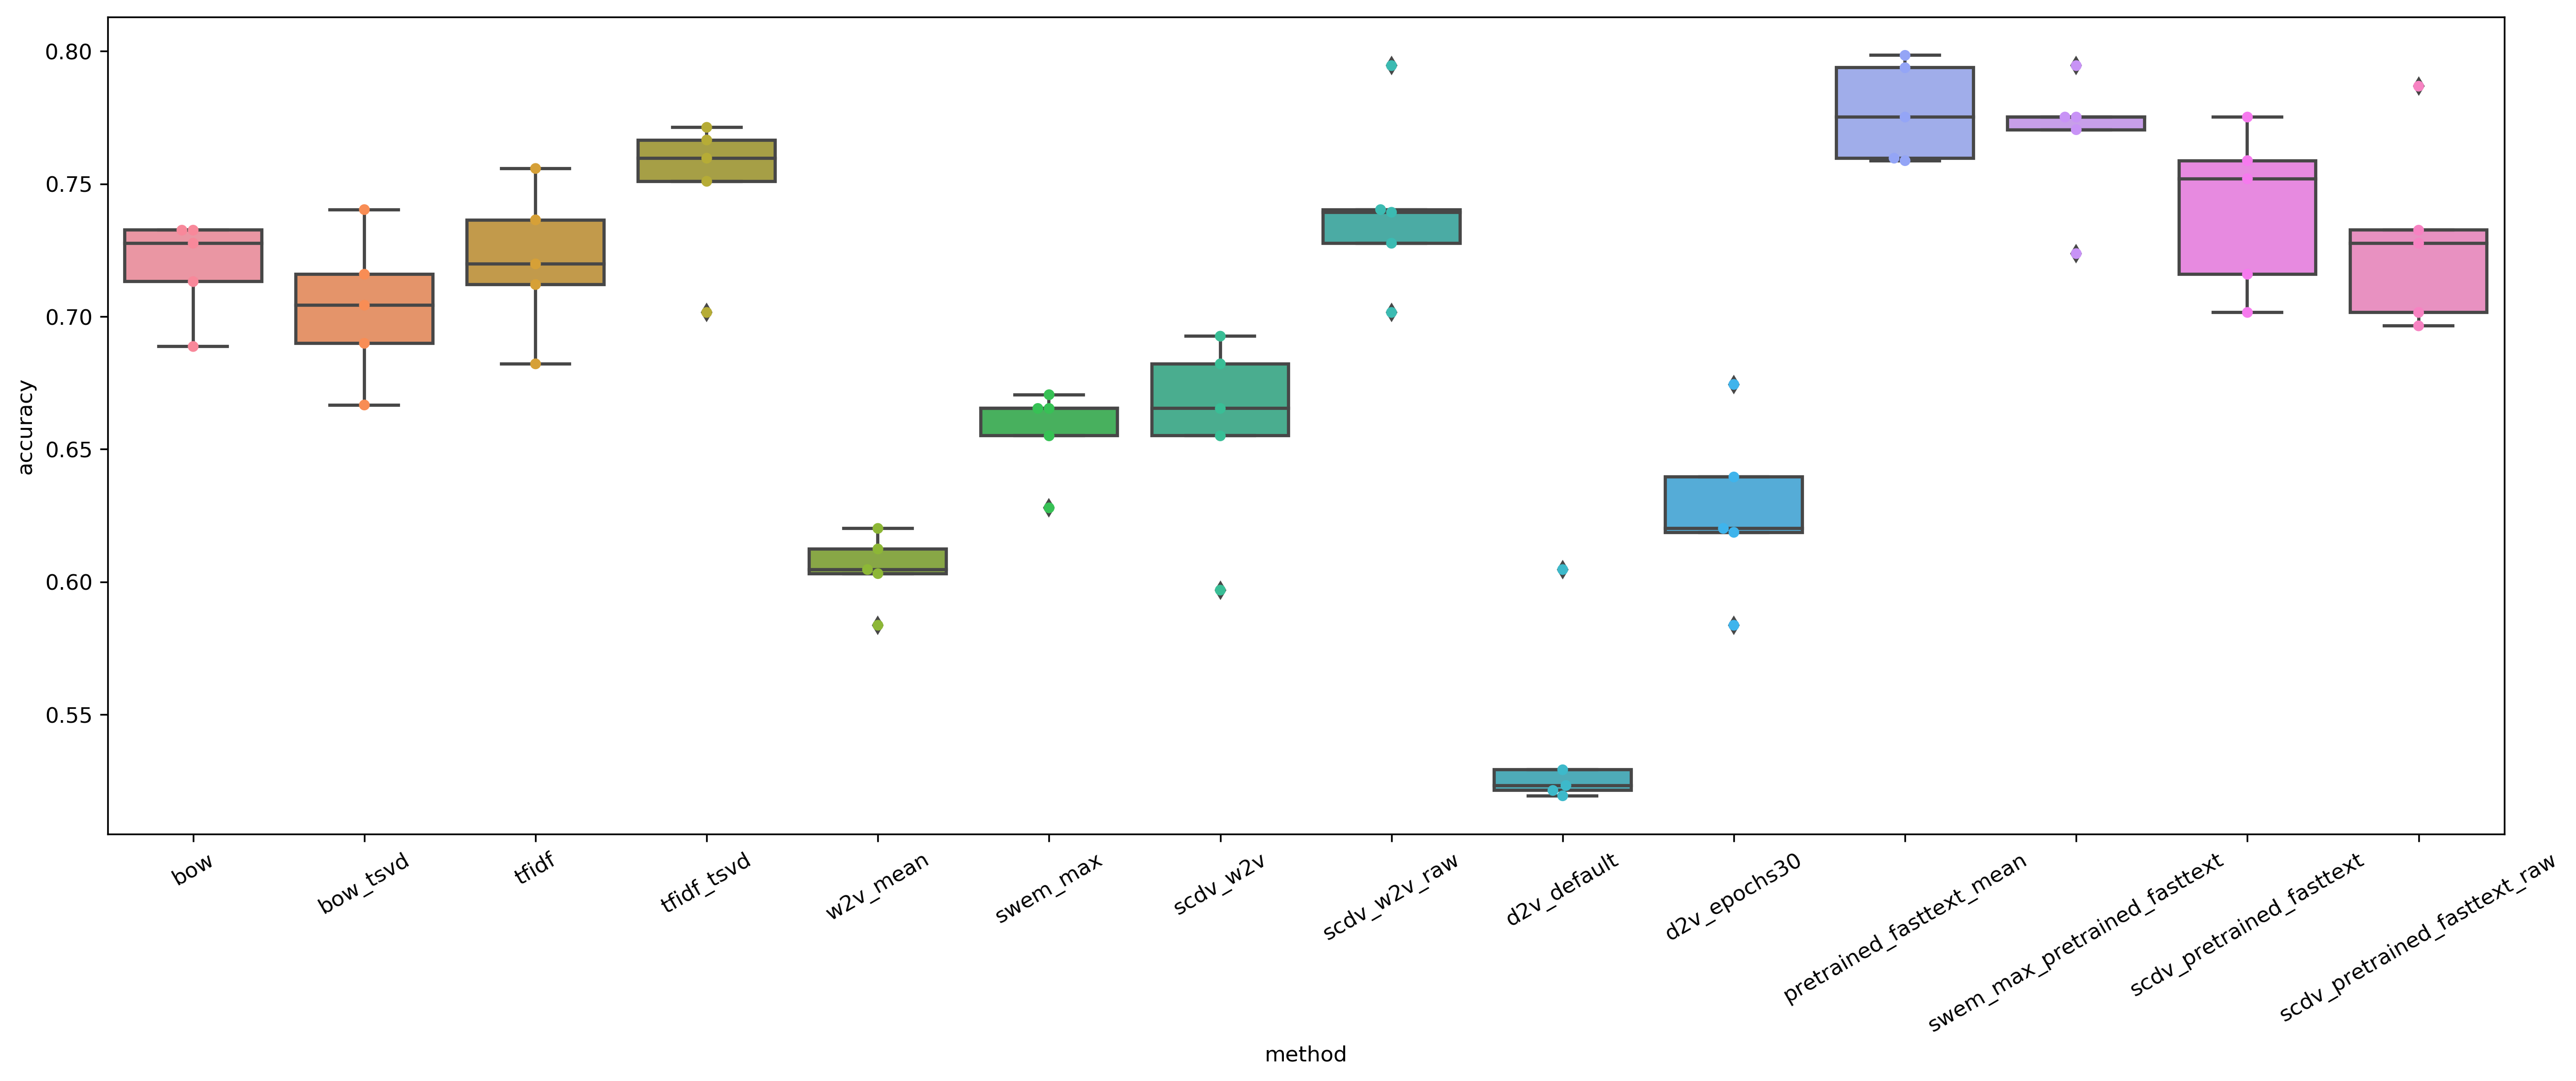

In [5]:
plot_accuracies(results_roomba[0])

In [6]:
def plot_scatter_time_acc(results):
    acc_df = pd.DataFrame(results[0])
    acc_mean = acc_df.mean().reset_index()
    acc_mean.columns = ['method', 'accuracy_mean']
    rename_dict = {
            'fasttext_mean': 'pretrained_fasttext_mean',
            'swem_max_fasttext': 'swem_max_pretrained_fasttext',
            'scdv_fasttext': 'scdv_pretrained_fasttext',
            'scdv_fasttext_raw': 'scdv_pretrained_fasttext_raw'
        }
    acc_mean['elapsed_time'] = acc_mean.method.apply(lambda x: results[1][x])
    acc_mean['method'] = acc_mean['method'].apply(lambda x: rename_dict.get(x, x))

    ax = acc_mean.plot.scatter(x='elapsed_time', y='accuracy_mean', figsize=(10, 7))
    for k, v in acc_mean.iterrows():
        ax.annotate(v[0], xy=(v[2], v[1]))

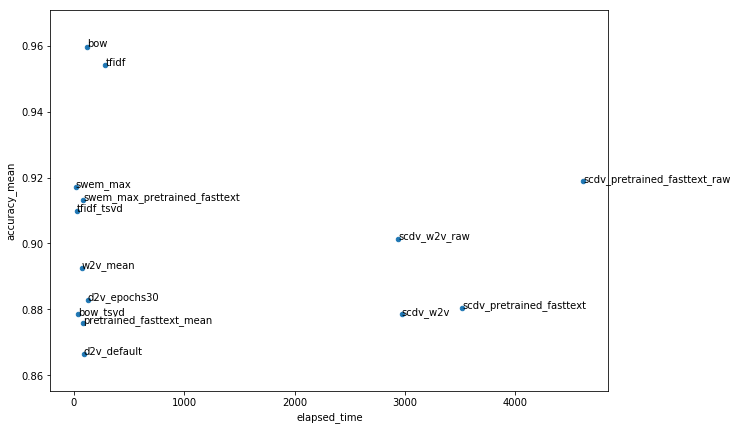

In [7]:
plot_scatter_time_acc(results_news)

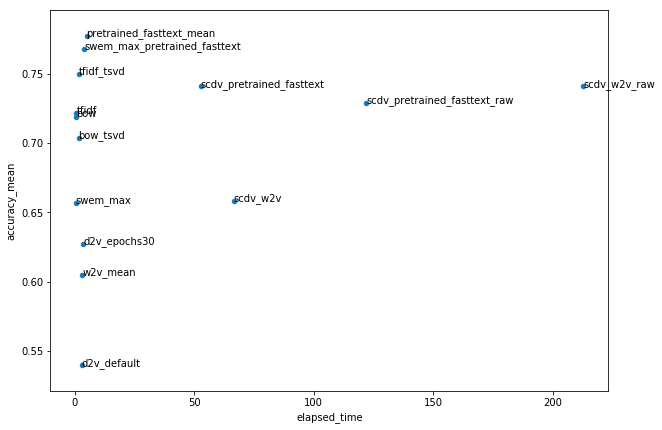

In [8]:
plot_scatter_time_acc(results_roomba)